### <span style="color:#32CD32">***Introduction***</span>

Healthcare quality standards and operational efficiency measure their effectiveness through hospital readmission metrics. Health care organizations face multiple challenges when patient readmission reaches high levels due to poor care and increased expenses that put a strain on hospital resources. Studies of readmission factors enable healthcare facilities to deploy prevention methods that enhance both patient results and hospital resource management.

The research intends to identify patient attributes and the influence of clinical characteristics and therapeutic factors on hospital admission and discharge processes. Our research utilizes machine learning regression methods to discover important causes of hospital readmissions while determining effective strategies for hospitals to prevent these preventable readmissions.

### <span style="color:#32CD32">***Problem Statement***</span>

Medical facilities face major difficulties when patients require repeated hospital admissions because these situations cause elevated costs and negative healthcare outcomes. Medical officials need to comprehend root socio-demographic elements alongside clinical aspects which drive hospital readmissions to enhance care quality and decrease avoidable hospital visits. The goal of this project is to create a forecasting model which assesses readmission probabilities through analyzing patient demographics together with diagnosis records along with previous medical treatments and clinical hospital stay data.

### <span style="color:#32CD32">***Business Statement***</span>

For healthcare institutions, reducing hospital readmission rates is not just a regulatory requirement but a crucial element in improving overall healthcare quality, optimizing resource management, and minimizing financial burdens. High readmission rates often indicate gaps in patient care, inadequate discharge planning, or underlying health conditions that were not effectively managed during the initial hospital stay. These readmissions can lead to increased healthcare costs, unnecessary strain on hospital capacity, and diminished patient satisfaction.

By leveraging predictive analytics and machine learning, hospitals can proactively identify high-risk patients and implement targeted interventions tailored to their specific needs. This includes enhanced post-discharge follow-ups, personalized treatment plans, medication adherence monitoring, and patient education initiatives. Additionally, understanding the key drivers behind readmissions allows healthcare providers to refine clinical workflows, improve coordination between departments, and ensure timely access to outpatient care.

A data-driven approach not only enhances patient outcomes by reducing preventable readmissions but also supports hospitals in meeting regulatory benchmarks, improving operational efficiency, and ensuring sustainable healthcare delivery. By integrating predictive modeling into decision-making processes, hospitals can shift from reactive to proactive patient management, ultimately fostering a more effective, cost-efficient, and patient-centered healthcare system.

### <span style="color:#32CD32">***Objectives***</span>


1. **Develop a Predictive Model** – Build a machine learning regression model that estimates the likelihood of patient readmission based on provided patient data. The model will utilize structured healthcare data, including patient demographics, medical history, diagnosis codes, and prescribed medications.  

2. **Identify Key Features** – Determine the most influential factors contributing to hospital readmissions. Some features, such as patient demographics and medical history, are crucial for understanding general hospital intake, while others, such as the number of lab procedures, inpatient visits, and specific medication use, are critical for predicting readmission risk. Identifying these key factors will enhance model performance and provide actionable insights for healthcare providers.  

3. **Perform Exploratory Data Analysis (EDA) and Feature Visualizations** – Conduct thorough data exploration and visualization to understand the distribution of features, detect missing values, and identify patterns associated with patient readmission. EDA will help in feature selection, transformation, and engineering for better model performance.  

4. **Enhance Patient Care Strategies** – Utilize insights from features such as the number of medications, prior hospital visits, and lab test results to create personalized follow-up care plans. For instance, patients with frequent hospital visits or multiple prescribed medications may require more intensive post-discharge monitoring to reduce readmission risks.  

5. **Support Clinical Decision-Making** – Provide healthcare professionals with data-driven insights to improve patient management. By leveraging predictive analytics, medical teams can proactively identify patients at high risk of readmission and implement timely interventions.  

6. **Evaluate Model Performance** – Assess the accuracy and reliability of the regression model using key performance metrics such as RMSE, R² score, and mean absolute error (MAE). A thorough evaluation will ensure that the model is robust and generalizable to unseen patient data.  

7. **Generate Recommendations and Conclusions** – Derive meaningful insights from the feature analysis and model results to offer actionable recommendations. This may include identifying high-risk patient groups, suggesting policy changes, or refining hospital intake processes to minimize unnecessary readmissions.  

8. **Optimize Discharge Planning** – Develop strategies to improve discharge and post-discharge care by analyzing key factors such as admission type, discharge disposition, and patient demographics. These insights can help hospitals design better transition care plans to prevent readmissions.  


### <span style="color:#32CD32">***Data Understanding***</span>

#### <span style="color:Green">*Data Importation, Inspection and Reviews*</span>

In [357]:
import pandas as pd
df1 = pd.read_csv(r"N:\Moringa\afterM\joseline 001\Diabetes_130-US_Hospitals_1999-2008\diabetic_data.csv")
df2 = pd.read_csv(r"N:\Moringa\afterM\joseline 001\Diabetes_130-US_Hospitals_1999-2008\IDS_mapping.csv")
df1.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


In [358]:
df2.head(3)

,admission_type_id,admission_type_id desc,discharge_disposition_id,discharge_disposition_id desc,admission_source_id,description admission_source_id
0,1.0,Emergency,1,Discharged to home,1.0,Physician Referral
1,2.0,Urgent,2,Discharged/transferred to another short term h...,2.0,Clinic Referral
2,3.0,Elective,3,Discharged/transferred to SNF,3.0,HMO Referral


In [359]:
df1.shape

(101766, 50)

In [360]:
#The info() function in pandas provides a concise summary of a DataFrame. It is useful for quickly understanding the structure and basic properties of our dataset.
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

From this we can review the data types , non-NaN valued columns and the index range. non-NaN helps know the approach for cleaning and the dtypes makes easy during column categorisation 

In [361]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


The dataset provides an in-depth explanation of each column, as detailed in the [column description](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-20). To refine our analysis, we will compute a correlation matrix to examine the relationships between the features and the target variable, `readmitted`. Based on the correlation weights of the independent variables with respect to the `column` `readmitted`, we will systematically decide which features to retain and which to drop for further modeling and analysis.



#### <span style="color:Green">*Undestanding target variable*</span>

In [362]:
#Check the Data Type
(df1['readmitted'].dtype)

dtype('O')

In [363]:
#Target variable Class Distribution.
df1['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


`readmitted` column has three unique categories:

- "NO" (Patients not readmitted) 
- ">30" (Readmitted after more than 30 days) 
- "<30" (Readmitted within 30 days) 

From this we can clearly tell of Class Imbalance

<Axes: ylabel='count'>

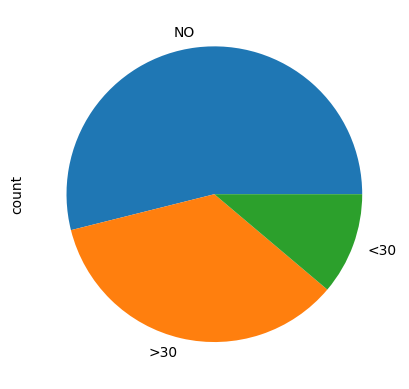

In [364]:
#Visualise dtype '0' with barplot
(df1['readmitted'].value_counts().plot(kind='pie'))

In [365]:
#encoding for ML models
df1['readmitted'] = df1['readmitted'].map({'NO': 0, '>30': 1, '<30' : 2})
df1['readmitted'].value_counts()

readmitted
0    54864
1    35545
2    11357
Name: count, dtype: int64

### <span style="color:#32CD32">***Data Cleaning***</span>

#### <span style="color:green">*handling missing vales*</span>

In [366]:
df1.isna().mean()[df1.isna().mean() >0 ]*100 #gets a total percentage of missing data 

max_glu_serum    94.746772
A1Cresult        83.277322
dtype: float64

The columns `max_glu_serum` and `A1Cresult` have a high percentage of missing values (94.75% and 83.28%, respectively) and indicates a large percentage of missing values and it wont be logical to fill with any method 

In [367]:
df1.dropna(inplace=True)

#### <span style='color:green'>*Handle Duplicates*</span>

In [368]:
df1.duplicated().sum() #to know the dup count
df1.drop_duplicates(inplace=True)

### <span style="color:#32CD32">***Data Preprocessing***</span>

Convert Categorical columns to proper format

In [369]:

# Getting specific column data types

object_cols = df1.select_dtypes(include=['object']).columns
int_cols = df1.select_dtypes(include=['int64']).columns

# Print results
print("\nObject Columns:\n", object_cols.tolist())
print("\nInteger Columns:\n", int_cols.tolist())



Object Columns:
 ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

Integer Columns:
 ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']


In [370]:
#Label Encodin for Ordinal Categories
from sklearn.preprocessing import LabelEncoder

# Encode Age
age_map = {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, 
           '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9}
df1['age'] = df1['age'].map(age_map)

# Encode Weight (if needed)
weight_encoder = LabelEncoder()
df1['weight'] = weight_encoder.fit_transform(df1['weight'])


In [371]:
# Convert categorical Yes/No columns to 0/1
binary_cols = ['change', 'diabetesMed']
df1[binary_cols] = df1[binary_cols].apply(lambda x: x.map({'No': 0, 'Ch': 1, 'Yes': 1}))

# Apply One-Hot Encoding
one_hot_cols = ['race', 'gender', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult']
df1 = pd.get_dummies(df1, columns=one_hot_cols, drop_first=True)

In [372]:
# Apply Label Encoding for Drug Response Columns
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
             'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
             'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
             'glipizide-metformin', 'glimepiride-pioglitazone', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

le = LabelEncoder()
for col in drug_cols:
    df1[col] = le.fit_transform(df1[col])

# Apply Frequency Encoding for Diagnoses
for col in ['diag_1', 'diag_2', 'diag_3']:
    df1[col] = df1[col].map(df1[col].value_counts(normalize=True))

In [373]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 162 to 101088
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   encounter_id                        298 non-null    int64  
 1   patient_nbr                         298 non-null    int64  
 2   age                                 298 non-null    int64  
 3   weight                              298 non-null    int64  
 4   admission_type_id                   298 non-null    int64  
 5   discharge_disposition_id            298 non-null    int64  
 6   admission_source_id                 298 non-null    int64  
 7   time_in_hospital                    298 non-null    int64  
 8   num_lab_procedures                  298 non-null    int64  
 9   num_procedures                      298 non-null    int64  
 10  num_medications                     298 non-null    int64  
 11  number_outpatient                   298 non-n

handling bool dtype , converting them to integers (0 and 1) to ensure consistency

In [374]:
df1 = df1.astype({col: 'int64' for col in df1.select_dtypes(include=['bool']).columns})


---

feature engineering 

---

class imbalance 

readmitted
1    139
0    123
2     36
Name: count, dtype: int64


C:\Users\Mbego John\AppData\Local\Temp\ipykernel_16308\2949180970.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1["readmitted"], palette="coolwarm")


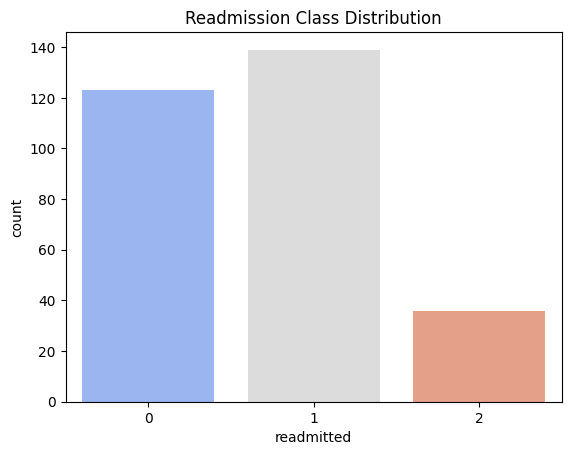

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check class distribution
print(df1["readmitted"].value_counts())

# Plot class distribution
sns.countplot(x=df1["readmitted"], palette="coolwarm")
plt.title("Readmission Class Distribution")
plt.show()

---

Define features and target

In [376]:

X = df1.drop(columns=["readmitted"])
y = df1["readmitted"]

1. class weight adjustment 

=== Logistic Regression WITHOUT Class Weights ===
              precision    recall  f1-score   support

           0       0.60      0.36      0.45        25
           1       0.53      0.86      0.66        28
           2       0.00      0.00      0.00         7

    accuracy                           0.55        60
   macro avg       0.38      0.41      0.37        60
weighted avg       0.50      0.55      0.49        60

ROC-AUC Score: 0.53389341868823


=== Logistic Regression WITH Class Weights ===
              precision    recall  f1-score   support

           0       0.57      0.32      0.41        25
           1       0.60      0.75      0.67        28
           2       0.18      0.29      0.22         7

    accuracy                           0.52        60
   macro avg       0.45      0.45      0.43        60
weighted avg       0.54      0.52      0.51        60

ROC-AUC Score: 0.6519621518418687


c:\Users\Mbego John\.conda\envs\dtascnce\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mbego John\.conda\envs\dtascnce\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mbego John\.conda\envs\dtascnce\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

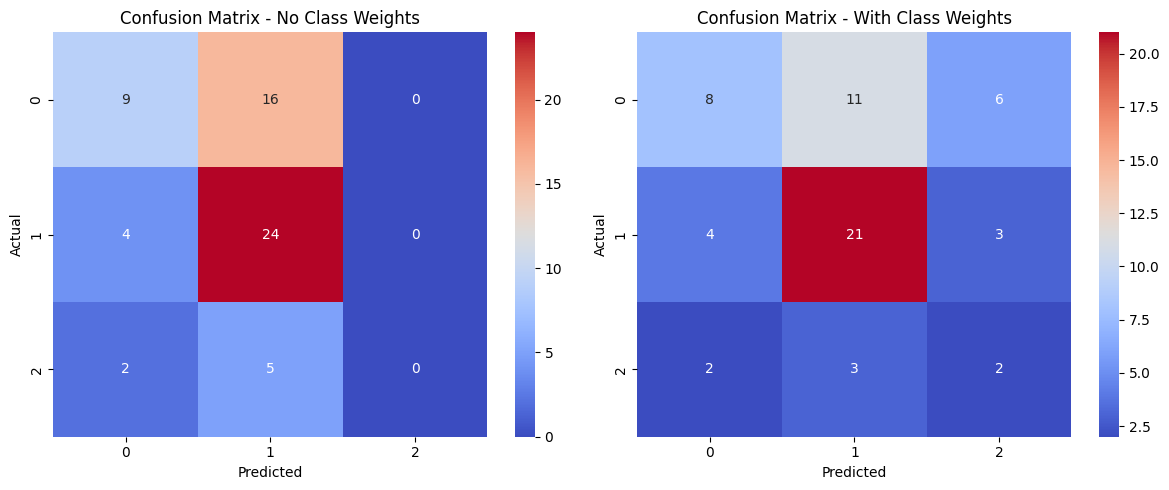

In [377]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression WITHOUT class weights
model_no_weights = LogisticRegression(random_state=42)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

# Train Logistic Regression WITH class weights
model_with_weights = LogisticRegression(class_weight="balanced", random_state=42)
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)

# Compute probabilities for ROC-AUC
y_prob_no_weights = model_no_weights.predict_proba(X_test)
y_prob_with_weights = model_with_weights.predict_proba(X_test)

# Print Evaluation Metrics
print("=== Logistic Regression WITHOUT Class Weights ===")
print(classification_report(y_test, y_pred_no_weights))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_no_weights, multi_class="ovr"))
print("\n")

print("=== Logistic Regression WITH Class Weights ===")
print(classification_report(y_test, y_pred_with_weights))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_with_weights, multi_class="ovr"))

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix without class weights
sns.heatmap(confusion_matrix(y_test, y_pred_no_weights), annot=True, fmt="d", cmap="coolwarm", ax=axes[0])
axes[0].set_title("Confusion Matrix - No Class Weights")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion matrix with class weights
sns.heatmap(confusion_matrix(y_test, y_pred_with_weights), annot=True, fmt="d", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Confusion Matrix - With Class Weights")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [378]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=len(y[y==0]) / len(y[y==1]))  # Adjust based on imbalance ratio
xgb.fit(X_train, y_train)


c:\Users\Mbego John\.conda\envs\dtascnce\lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

after class weights the comparison seeks to venture on other methods 

2. resampling methods 

SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples of the minority class

In [379]:
#Oversampling the Minority Class

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())


Before SMOTE: readmitted
1    139
0    123
2     36
Name: count, dtype: int64
After SMOTE: readmitted
2    139
1    139
0    139
Name: count, dtype: int64


Undersampling the Majority Class

In [380]:
#Randomly remove samples from the majority class to balance the dataset
#considered because we have a large dataset 

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("After Undersampling:", pd.Series(y_resampled).value_counts())


After Undersampling: readmitted
0    36
1    36
2    36
Name: count, dtype: int64


In [381]:

#adding models for the balance evaluation 

#y_pred = model.predict(X_test)
#print(classification_report(y_test, y_pred))
#print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr"))

